# Diamonds Price Prediction - Linear Models

#### In this notebook we will follow with the implemenation of linear models in the diamonds dataset

In [1]:
#import general libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

/home/diego/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#### Training Data

In [2]:
traindf = pd.read_csv("OUTPUT/cleaned_train.csv")
print(traindf.shape)
traindf.head()

(40339, 9)


,Unnamed: 0,carat,cut,color,clarity,depth,table,price,volume
0,0,1.21,Ideal,H,VS2,63.0,57.0,6134,190.734930
1,1,0.28,Very Good,D,VVS2,64.0,56.0,532,45.921708
2,2,0.42,Premium,F,VS1,61.2,58.0,1103,69.338592
3,3,0.26,Ideal,H,IF,61.1,57.0,600,43.362176
4,4,1.10,Good,G,SI1,63.4,57.0,4997,176.802840


#### To implement linear models in our data, we need linear data, so lets transform the categorical variables in dummies and exclude the index

In [3]:
train_dum = pd.get_dummies(traindf.iloc[:,1:])
train_dum.head()

,carat,depth,table,price,volume,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,1.21,63.0,57.0,6134,190.734930,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0.28,64.0,56.0,532,45.921708,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
2,0.42,61.2,58.0,1103,69.338592,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0.26,61.1,57.0,600,43.362176,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
4,1.10,63.4,57.0,4997,176.802840,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0


#### But before implementing the linear models, we have to check 3 steps:
    - Correlation between variables
    - How each independent variable explain price
    - If we need to scale our data

#### Correlation 

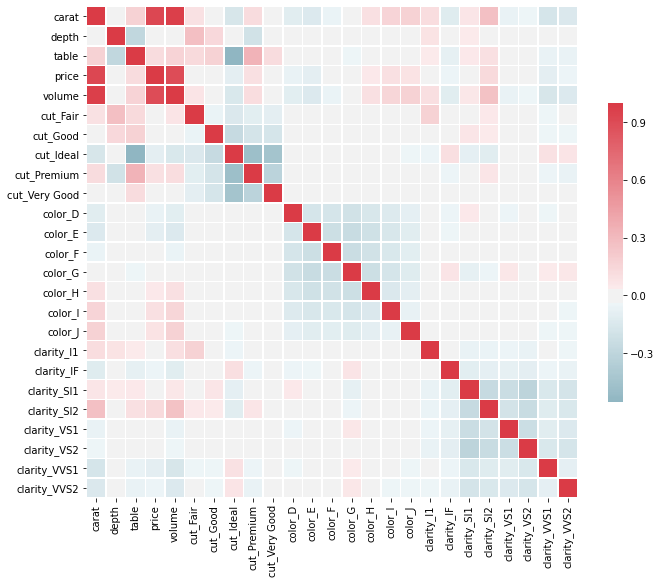

In [4]:
# Generate a mask for the upper triangle
#mask = np.triu(np.ones_like(train_dum.corr(), dtype=np.bool))
#I let the mask here in case someone prefers to apply it, however I see more clear inputs without the mask

plt.figure(figsize=(11, 11))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(train_dum.corr(), mask=None, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

#### As we have seen in the descriptive analysis, the price is highly correlated with carat and volume and also these to independet variables too. The problem with the corr between the 2 independent variables is that it causes the predictive coefficients to be unstable, because the "independent variables" have become "dependent". So we are going to do an OLS regression using statsmodels, to check the effect of the independent variables on the dependent one

In [5]:
X_t = train_dum.drop(columns={"price"})
y_t = train_dum.price

In [6]:
import statsmodels.api as sm
from statsmodels.regression.linear_model import OLS
from statsmodels.tools.eval_measures import rmse

X = X_t
X = sm.add_constant(X_t)
y = y_t
model = sm.OLS(y, X).fit()
y_pred = model.predict(X)
resi = rmse(y, y_pred)
print(resi)
model.summary()

1149.4188308870382


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.917
Method:                 Least Squares   F-statistic:                 2.111e+04
Date:                Sun, 10 May 2020   Prob (F-statistic):               0.00
Time:                        02:06:08   Log-Likelihood:            -3.4151e+05
No. Observations:               40339   AIC:                         6.831e+05
Df Residuals:                   40317   BIC:                         6.832e+05
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          -820.3748    282.842     -2.900      0.004   -1374.751    -265.999
carat          8815.3800     51.515    171.122      0.000    8714.409    8916.351
depth           -18.2060      4.718     -3.859      0.000     -27.453      -8.959
table           -23.8873      3.418     -6.989      0.000     -30.586     -17.188
volume            0.7376      0.306      2.409      0.016       0.138       1.338
cut_Fair       -772.7999     72.215    -10.701      0.000    -914.343    -631.257
cut_Good       -157.1419     61.084     -2.573      0.010    -276.868     -37.415
cut_Ideal        93.1201     50.386      1.848      0.065      -5.637     191.877
cut_Premium      22.9246     55.557      0.413      0.680     -85.968     131.817
cut_Very Good    -6.4777     55.945     -0.116      0.908    -116.131     103.175
color_D         708.5097     42.978     16.485      0.000     624.271     792.748
color_E         500.8047     42.228     11.859      0.000     418.036     583.573
color_F         401.8368     42.140      9.536      0.000     319.242     484.432
color_G         202.3346     42.155      4.800      0.000     119.710     284.960
color_H        -278.0395     42.857     -6.488      0.000    -362.040    -194.040
color_I        -733.2558     44.113    -16.622      0.000    -819.719    -646.793
color_J       -1622.5652     46.947    -34.561      0.000   -1714.583   -1530.547
clarity_I1    -3800.0003     58.190    -65.303      0.000   -3914.054   -3685.946
clarity_IF     1511.2604     44.686     33.819      0.000    1423.674    1598.846
clarity_SI1    -354.7603     38.166     -9.295      0.000    -429.566    -279.955
clarity_SI2   -1298.4922     38.724    -33.532      0.000   -1374.392   -1222.592
clarity_VS1     603.7396     38.241     15.788      0.000     528.787     678.693
clarity_VS2     292.7714     37.851      7.735      0.000     218.583     366.959
clarity_VVS1   1169.2542     40.944     28.557      0.000    1089.003    1249.506
clarity_VVS2   1055.8525     39.479     26.744      0.000     978.472    1133.233
==============================================================================
Omnibus:                    11462.946   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           104715.125
Skew:                           1.105   Prob(JB):                         0.00
Kurtosis:                      10.577   Cond. No.                     1.91e+18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.15e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

#### We can see the columns cut Ideal, Premium and Vergy Good are not significant and Volume isn't at 1% significance level so we are going to try again without these vars to check if the rmse of our model improves

In [7]:
X_t2 = train_dum.drop(columns={"price","volume","cut_Very Good","cut_Ideal","cut_Premium" })

In [8]:
X = X_t2
X = sm.add_constant(X_t2)
y = y_t
model = sm.OLS(y, X).fit()
y_pred = model.predict(X)
resi2 = rmse(y, y_pred)
print(resi2)
model.summary()

1150.0282365522778


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.917
Method:                 Least Squares   F-statistic:                 2.460e+04
Date:                Sun, 10 May 2020   Prob (F-statistic):               0.00
Time:                        02:06:08   Log-Likelihood:            -3.4153e+05
No. Observations:               40339   AIC:                         6.831e+05
Df Residuals:                   40320   BIC:                         6.833e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -26.3884    300.972     -0.088      0.930    -616.300     563.523
carat         8933.4634     13.962    639.841      0.000    8906.098    8960.829
depth          -24.2600      4.624     -5.247      0.000     -33.323     -15.197
table          -34.0668      2.910    -11.708      0.000     -39.770     -28.364
cut_Fair      -788.7890     37.187    -21.212      0.000    -861.676    -715.902
cut_Good      -186.0689     20.895     -8.905      0.000    -227.023    -145.115
color_D        823.1917     45.298     18.173      0.000     734.406     911.977
color_E        613.5122     44.692     13.728      0.000     525.915     701.109
color_F        514.3130     44.630     11.524      0.000     426.838     601.788
color_G        316.1526     44.629      7.084      0.000     228.679     403.626
color_H       -165.1011     45.383     -3.638      0.000    -254.054     -76.148
color_I       -618.5355     46.461    -13.313      0.000    -709.599    -527.472
color_J      -1509.9214     49.317    -30.617      0.000   -1606.583   -1413.260
clarity_I1   -3702.9193     60.034    -61.680      0.000   -3820.588   -3585.250
clarity_IF    1619.1612     45.807     35.347      0.000    1529.378    1708.945
clarity_SI1   -260.0570     40.588     -6.407      0.000    -339.609    -180.505
clarity_SI2  -1204.2441     41.143    -29.270      0.000   -1284.885   -1123.603
clarity_VS1    702.4763     40.308     17.428      0.000     623.472     781.480
clarity_VS2    391.2267     40.021      9.775      0.000     312.784     469.669
clarity_VVS1  1272.0367     42.583     29.872      0.000    1188.573    1355.500
clarity_VVS2  1155.9309     41.305     27.985      0.000    1074.972    1236.890
==============================================================================
Omnibus:                    11426.265   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           104410.999
Skew:                           1.101   Prob(JB):                         0.00
Kurtosis:                      10.568   Cond. No.                     7.00e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.86e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

#### As we see, excluding that columns made our rmse a bit higher, so we will not exclude any columns to train our models. But before training our models, lets see if the data needs to be scaled

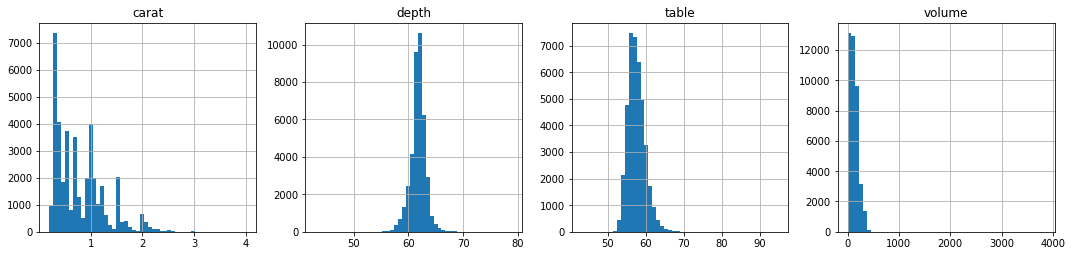

In [9]:
X_notdum = train_dum.iloc[:,[0,1,2,4]]

figure = plt.figure(figsize=(15,10))

for n, col in enumerate(X_notdum.columns):
    ax = figure.add_subplot(3,4,n+1)
    ax.set_title(col)
    X_notdum[col].hist(ax=ax, bins=50)
    
figure.tight_layout() #this feature separate the graphs correctly
plt.show()

#### We can see there is a big difference between the values of the explanatory variables so it is better to scale our data

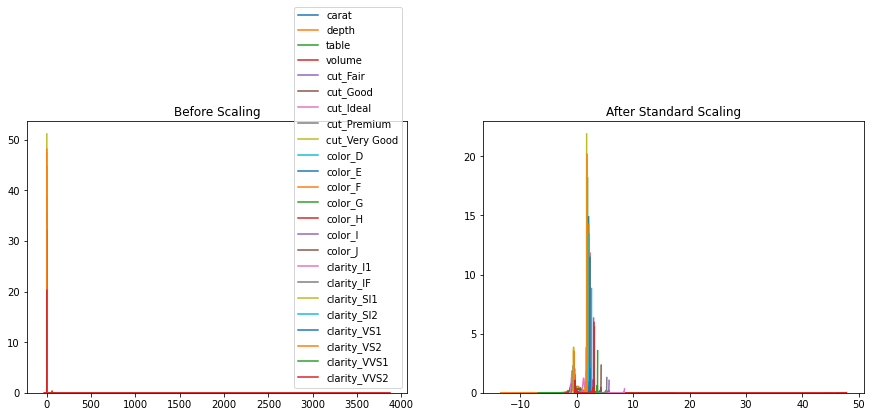

In [10]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()

Xss = sc_X.fit_transform(X_t)

train_SS = pd.DataFrame(Xss, columns=['carat', 'depth', 'table', 'volume', 'cut_Fair', 'cut_Good',
       'cut_Ideal', 'cut_Premium', 'cut_Very Good', 'color_D', 'color_E',
       'color_F', 'color_G', 'color_H', 'color_I', 'color_J', 'clarity_I1',
       'clarity_IF', 'clarity_SI1', 'clarity_SI2', 'clarity_VS1',
       'clarity_VS2', 'clarity_VVS1', 'clarity_VVS2'])

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15, 5))
ax1.set_title('Before Scaling')
for e in X_t.columns:
    sns.kdeplot(X_t[e], ax=ax1)
ax2.set_title('After Standard Scaling')
for e in train_SS.columns:
    sns.kdeplot(train_SS[e], ax=ax2, legend=None)
plt.show()

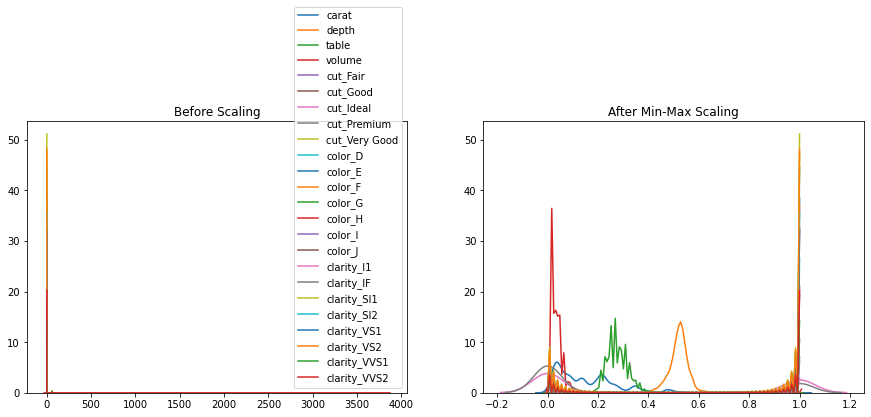

In [11]:
from sklearn.preprocessing import MinMaxScaler
mmc_X = MinMaxScaler()

Xmm = mmc_X.fit_transform(X_t)

train_MM = pd.DataFrame(Xmm, columns=['carat', 'depth', 'table', 'volume', 'cut_Fair', 'cut_Good',
       'cut_Ideal', 'cut_Premium', 'cut_Very Good', 'color_D', 'color_E',
       'color_F', 'color_G', 'color_H', 'color_I', 'color_J', 'clarity_I1',
       'clarity_IF', 'clarity_SI1', 'clarity_SI2', 'clarity_VS1',
       'clarity_VS2', 'clarity_VVS1', 'clarity_VVS2'])

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15, 5))
ax1.set_title('Before Scaling')
for e in X_t.columns:
    sns.kdeplot(X_t[e], ax=ax1)
ax2.set_title('After Min-Max Scaling')
for e in train_MM.columns:
    sns.kdeplot(train_MM[e], ax=ax2, legend=None)
plt.show()

#### After processing the data, the standard scaler looks better to train our models

In [12]:
from sklearn.metrics import mean_squared_error, r2_score 
from sklearn.model_selection import train_test_split

X = train_SS
y = np.ravel(y_t) #we use np.ravel to change shape (x,1) to (x,)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(32271, 24) (8068, 24) (32271,) (8068,)


In [45]:
#1st select the splited X and y. Then after your model achieves the accuracy needed, train with 100% X and y
#However if you thing you could be overfitting your data you can use the splited model to test
# X, y ----- X_train, y_train
X_training = X
y_training = y

### Linear Regression

In [46]:
from sklearn.linear_model import LinearRegression

lreg = LinearRegression(fit_intercept=True, normalize=False).fit(X_training, y_training) 
  
lreg_pred = lreg.predict(X_test)

In [47]:
lreg_r2 = lreg.score(X_test, y_test)

lreg_rmse = mean_squared_error(y_test, lreg_pred, sample_weight=None, multioutput='uniform_average', squared=False)

print("r2:",lreg_r2,"rmse:",lreg_rmse)

r2: 0.9142224167271978 rmse: 1154.3942096134883


#### Check for Heteroskedasticity --> there will be if the residuals don't have a constant variance

Text(0.5, 1.0, 'Residual plot')

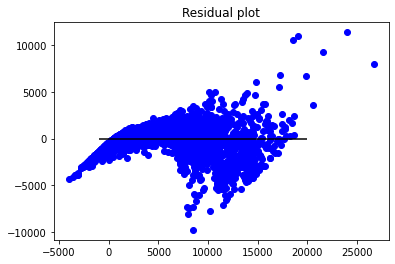

In [48]:
plt.scatter(lreg_pred, (lreg_pred - y_test), c='b')

plt.hlines(y=0, xmin= -1000, xmax=20000)

plt.title('Residual plot')

#### We can see there is Heteroskedasticity as the variance of the residuals get broader when x rises, so we will use a polynomial feature to avoid it

### Polynomial Regression

In [49]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
model = Pipeline([('poly', PolynomialFeatures(degree=3)),
                ('linear', LinearRegression(fit_intercept=False))])

polyreg = model.fit(X_training, y_training) 

poly_pred = polyreg.predict(X_test)

In [50]:
poly_r2 = polyreg.score(X_test, y_test)

poly_rmse = mean_squared_error(y_test, poly_pred, sample_weight=None, multioutput='uniform_average', squared=False)

print("r2:",poly_r2,"rmse:",poly_rmse)

r2: 0.9780736552052136 rmse: 583.647132597247


Text(0.5, 1.0, 'Residual plot')

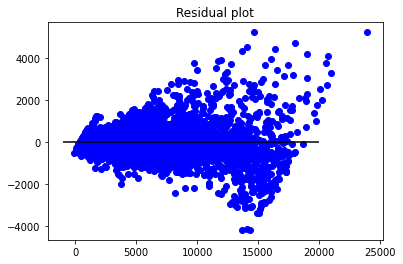

In [51]:
plt.scatter(poly_pred, (poly_pred - y_test), c='b')

plt.hlines(y=0, xmin= -1000, xmax=20000)

plt.title('Residual plot')

#### Well, we see that actually we have less Heteroskedasticity, but our model has become less accurate as it has some big outliers

#### After applying a polynomial feature just made our results worse, we will check if we can improve them with regularization (remember our model had Multicollinearity)

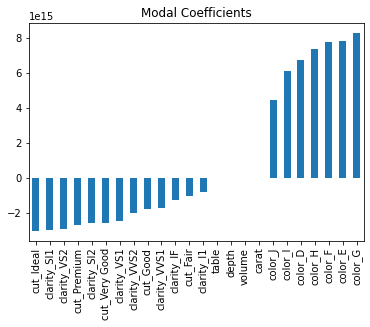

In [52]:
predictors = X_training.columns

coef = pd.Series(lreg.coef_,predictors).sort_values()

coef.plot(kind='bar', title='Modal Coefficients')

### Ridge Regression 

In [53]:
from sklearn.linear_model import Ridge

ridreg = Ridge(fit_intercept=True, normalize=False, alpha=0.01).fit(X_training, y_training) 

ridreg_pred = ridreg.predict(X_test)

In [54]:
rid_r2 = ridreg.score(X_test, y_test)

ridreg_rmse = mean_squared_error(y_test, ridreg_pred, sample_weight=None, multioutput='uniform_average', squared=False)

print("r2:",rid_r2,"rmse:",ridreg_rmse)

r2: 0.9142600007418662 rmse: 1154.1412791808334


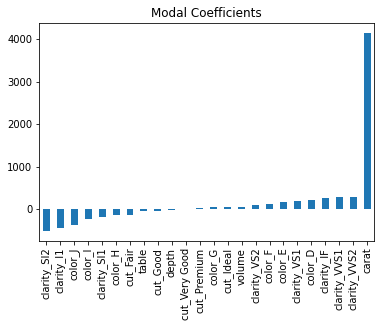

In [55]:
predictors = X_training.columns

coef = pd.Series(ridreg.coef_,predictors).sort_values()

coef.plot(kind='bar', title='Modal Coefficients')

### Lasso Regression

In [56]:
from sklearn.linear_model import Lasso

lassreg = Lasso(fit_intercept=True, normalize=True, alpha=0.01).fit(X_training, y_training) 

lassreg_pred = lassreg.predict(X_test)

In [57]:
lass_r2 = lassreg.score(X_test, y_test)

lassreg_rmse = mean_squared_error(y_test, lassreg_pred, sample_weight=None, multioutput='uniform_average', squared=False)

print("r2:",lass_r2,"rmse:",lassreg_rmse)

r2: 0.914311987632748 rmse: 1153.7913298279586


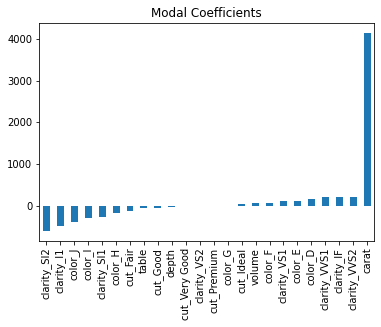

In [58]:
predictors = X_training.columns

coef = pd.Series(lassreg.coef_,predictors).sort_values()

coef.plot(kind='bar', title='Modal Coefficients')

### Elastic Net Regression

In [59]:
from sklearn.linear_model import ElasticNet

enetreg = ElasticNet(fit_intercept=True, normalize=False, alpha=0.01, l1_ratio=0.5).fit(X_training, y_training) 

enetreg_pred = enetreg.predict(X_test)

In [60]:
enet_r2 = enetreg.score(X_test, y_test)

enet_rmse = mean_squared_error(y_test, enetreg_pred, sample_weight=None, multioutput='uniform_average', squared=False)

print("r2:",enet_r2,"rmse:",enet_rmse)

r2: 0.9145470059044098 rmse: 1152.2079798205257


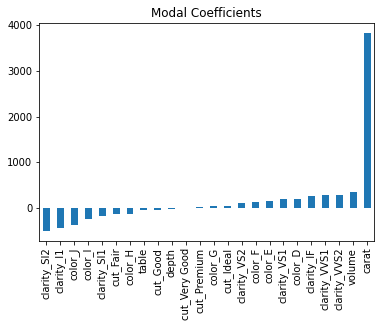

In [61]:
predictors = X_training.columns

coef = pd.Series(enetreg.coef_,predictors).sort_values()

coef.plot(kind='bar', title='Modal Coefficients')

### LARS

In [62]:
from sklearn.linear_model import LassoLars

LARSreg = LassoLars(fit_intercept=True, normalize=False, alpha=0.01).fit(X_training, y_training) 

LARSreg_pred = LARSreg.predict(X_test)

In [63]:
LARS_r2 = LARSreg.score(X_test, y_test)

LARS_rmse = mean_squared_error(y_test, LARSreg_pred, sample_weight=None, multioutput='uniform_average', squared=False)

print("r2:",LARS_r2,"rmse:",LARS_rmse)

r2: 0.9142602728751832 rmse: 1154.1394475937882


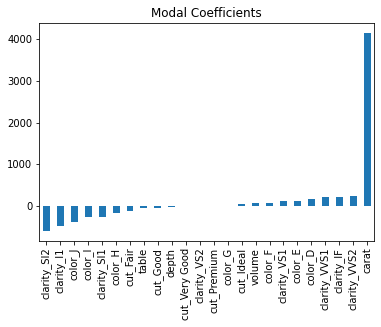

In [64]:
predictors = X_training.columns

coef = pd.Series(LARSreg.coef_,predictors).sort_values()

coef.plot(kind='bar', title='Modal Coefficients')

### Bayessian Ridge

In [65]:
from sklearn.linear_model import BayesianRidge

bayreg = BayesianRidge().fit(X_training, y_training) 

bayreg_pred = bayreg.predict(X_test)

In [66]:
bay_r2 = bayreg.score(X_test, y_test)

bay_rmse = mean_squared_error(y_test, bayreg_pred, sample_weight=None, multioutput='uniform_average', squared=False)

print("r2:",bay_r2,"rmse:",bay_rmse)

r2: 0.9142629057853469 rmse: 1154.1217267022437


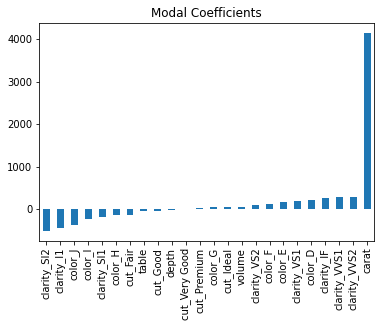

In [67]:
predictors = X_training.columns

coef = pd.Series(bayreg.coef_,predictors).sort_values()

coef.plot(kind='bar', title='Modal Coefficients')

### Robust Regressor: Huber

In [68]:
from sklearn.linear_model import HuberRegressor

hubreg = HuberRegressor().fit(X_training, y_training) 

hubreg_pred = hubreg.predict(X_test)

In [69]:
hub_r2 = hubreg.score(X_test, y_test)

hub_rmse = mean_squared_error(y_test, hubreg_pred, sample_weight=None, multioutput='uniform_average', squared=False)

print("r2:",hub_r2,"rmse:",hub_rmse)

r2: 0.9057628918326454 rmse: 1209.9800559274665


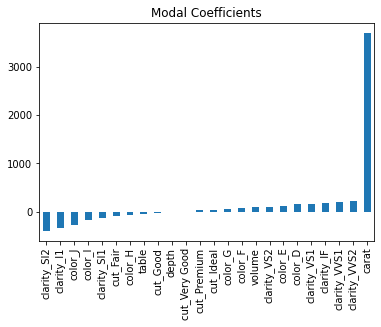

In [70]:
predictors = X_training.columns

coef = pd.Series(hubreg.coef_,predictors).sort_values()

coef.plot(kind='bar', title='Modal Coefficients')

#### We can see even following all the steps, the linear models don't look like good predictors for our dataset. Could be due to our categorical variables, in real life are nominal, and to fit the linear models we have to turn them to dummies 

#### However lets test the Lasso model (our best opt) in the test dataset

In [71]:
testdf = pd.read_csv("INPUT/diamonds_test.csv")
print(testdf.shape)
testdf.head()

(13449, 10)


,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z
0,0,0.30,Ideal,H,SI2,60.0,56.0,4.41,4.43,2.65
1,1,0.34,Ideal,D,IF,62.1,57.0,4.52,4.46,2.79
2,2,1.57,Very Good,I,VS2,60.3,58.0,7.58,7.55,4.56
3,3,0.31,Ideal,H,VS2,61.8,57.0,4.32,4.36,2.68
4,4,1.51,Good,I,VVS1,64.0,60.0,7.26,7.21,4.63


#### Compute Volume

In [72]:
testdf["volume"] = testdf.x * testdf.y * testdf.z
testdf.drop(columns={"Unnamed: 0","x","y","z"}, inplace=True)

In [73]:
test_dum = pd.get_dummies(testdf)

In [74]:
test_dum.head()

,carat,depth,table,volume,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.30,60.0,56.0,51.771195,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0.34,62.1,57.0,56.244168,0,0,1,0,0,1,...,0,0,0,1,0,0,0,0,0,0
2,1.57,60.3,58.0,260.964240,0,0,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
3,0.31,61.8,57.0,50.478336,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,1.51,64.0,60.0,242.355498,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0


In [75]:
Xss_test = sc_X.fit_transform(test_dum)

test_SS = pd.DataFrame(Xss_test, columns=['carat', 'depth', 'table', 'volume', 'cut_Fair', 'cut_Good',
       'cut_Ideal', 'cut_Premium', 'cut_Very Good', 'color_D', 'color_E',
       'color_F', 'color_G', 'color_H', 'color_I', 'color_J', 'clarity_I1',
       'clarity_IF', 'clarity_SI1', 'clarity_SI2', 'clarity_VS1',
       'clarity_VS2', 'clarity_VVS1', 'clarity_VVS2'])

#### Now we will use our 2 best models. So we train our models again but with 100% of the data and take the 2 best

#### Surprisingly, after applying the 100%, the polynomial model has the best rmse by far out of all the models. However we will test with the Polynomial and the Elastic Net Models

In [ ]:
poly_pred = polyreg.predict(test_SS)

In [ ]:
enetreg_pred = enetreg.predict(test_SS)